In [138]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, minmax_scale

from sklearn.linear_model import LinearRegression, ridge_regression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb



In [140]:
train_data = pd.read_csv("train.csv")
# y_train = train_data['SalePrice']
test_data = pd.read_csv("test.csv")

train_data.head()
# len(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Numerical Features

In [141]:
# numerical_feature = data[[i for i,j in data.items() if data[i].dtype != 'O']]
# numerical_feature.head()

train_data.dtypes[train_data.dtypes != 'O']
outliers_Id= np.array([])

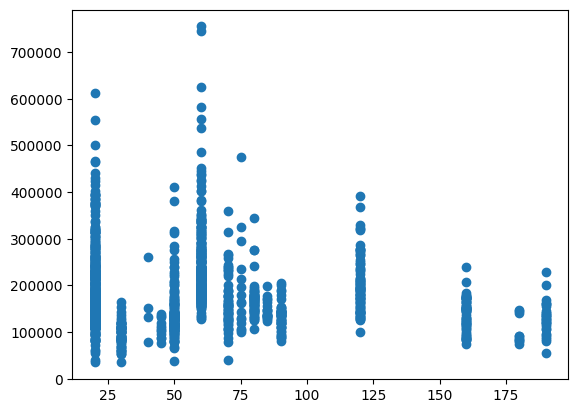

In [142]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_data)

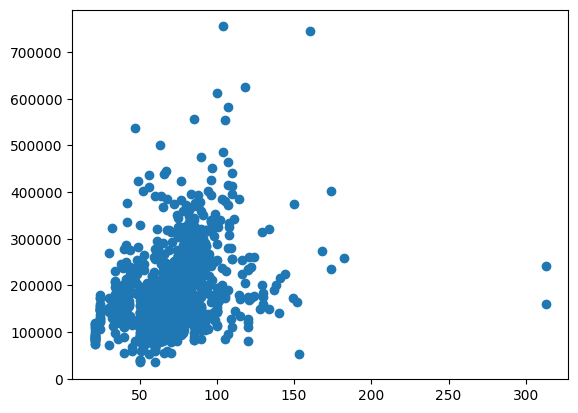

In [143]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_data)

In [144]:
outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('LotFrontage > 295')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)

# 1299, 935

[ 935. 1299.]


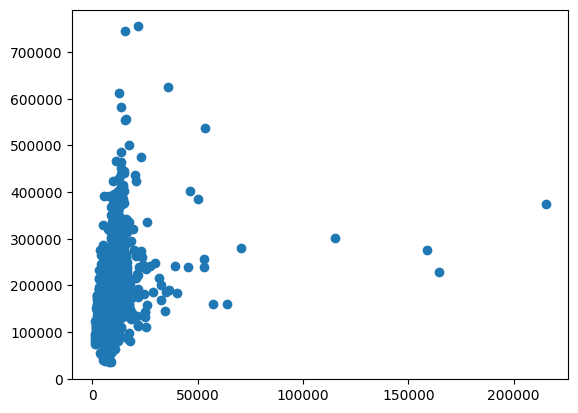

In [145]:
plt.scatter(x='LotArea', y='SalePrice', data=train_data)

In [146]:
outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('LotArea > 150000')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)

[ 935. 1299.  250.  314.  336.]


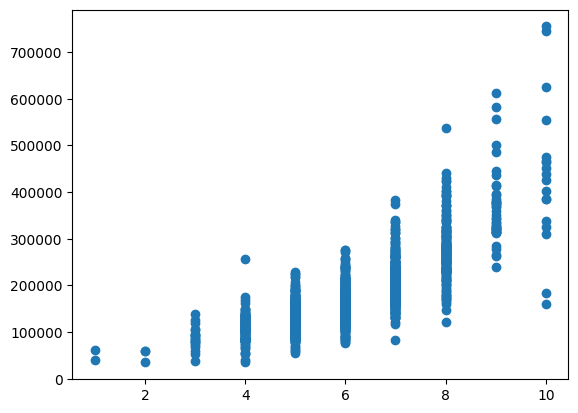

In [147]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_data)

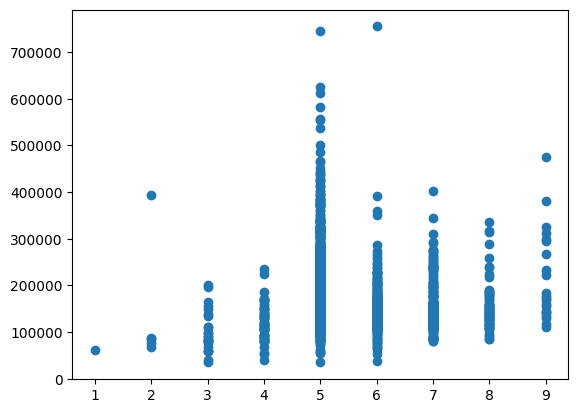

In [148]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_data)

In [149]:


outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('OverallCond == 2 and SalePrice == 394432')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)

[ 935. 1299.  250.  314.  336.  379.]


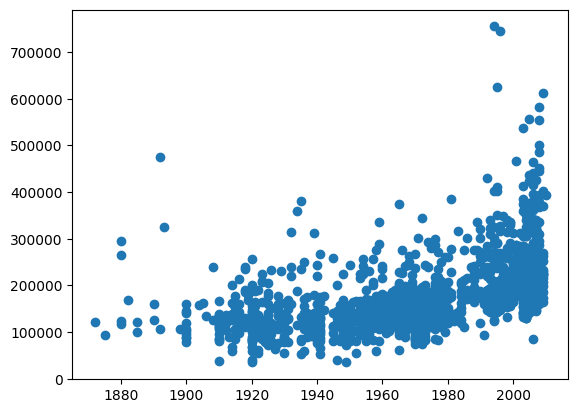

In [150]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_data)

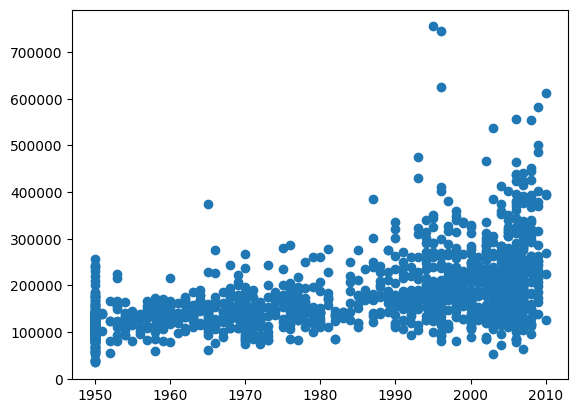

In [151]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_data)

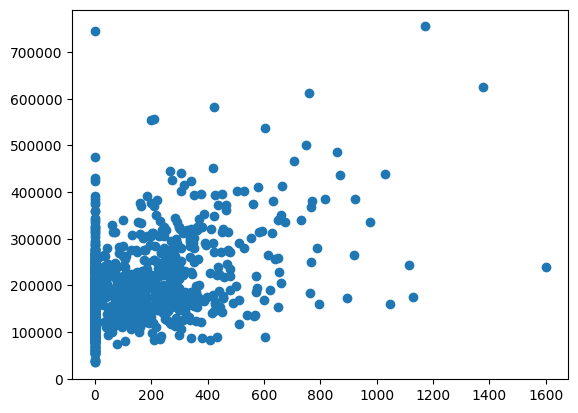

In [152]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_data)

In [153]:


outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('MasVnrArea > 1150')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)

[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170.]


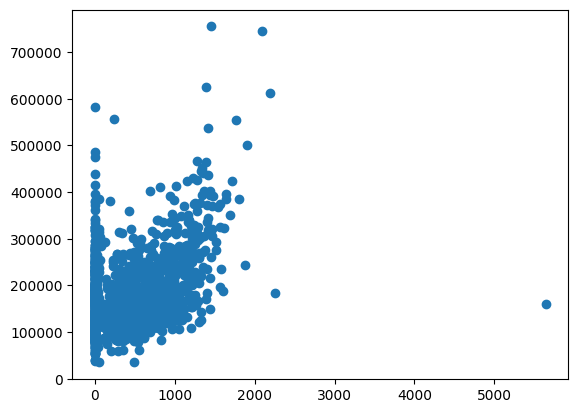

In [154]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_data)

In [155]:




outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('BsmtFinSF1 > 5000')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)


[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299.]


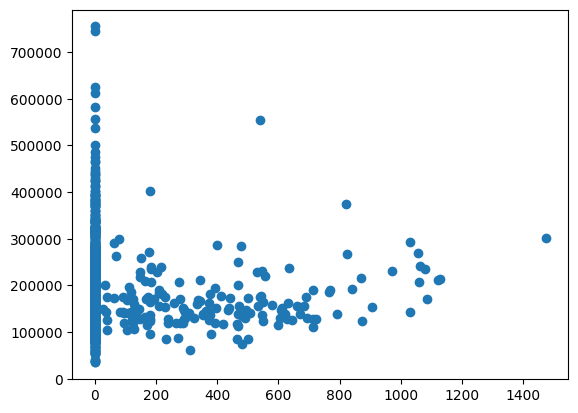

In [156]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_data)

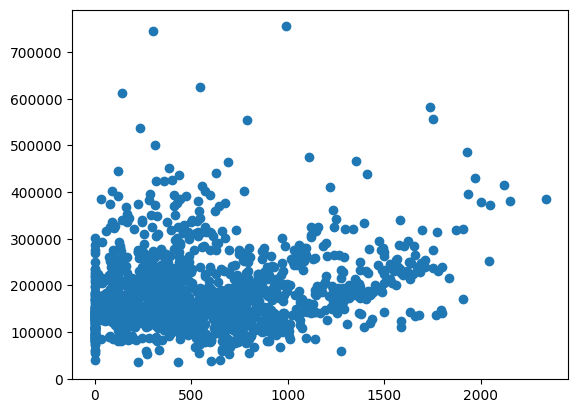

In [157]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_data)

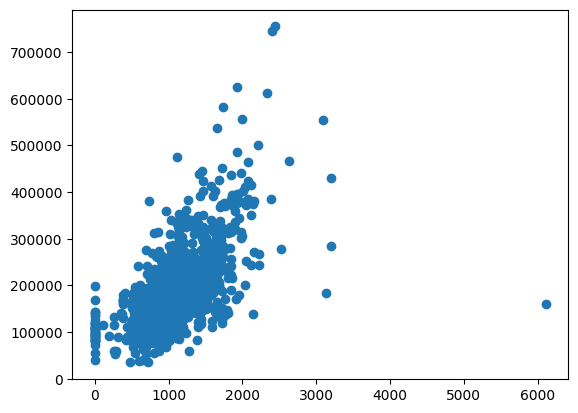

In [158]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_data)

In [159]:

outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('TotalBsmtSF > 5000')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)


[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.]


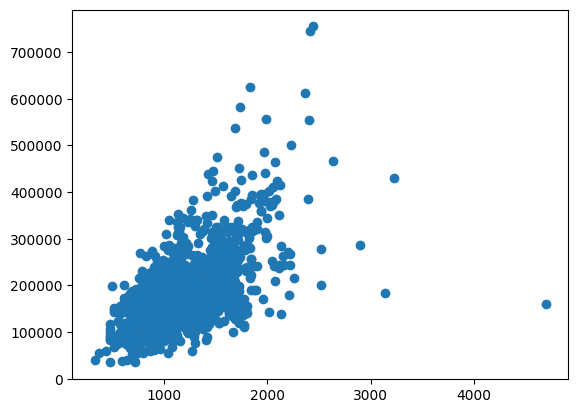

In [160]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_data)

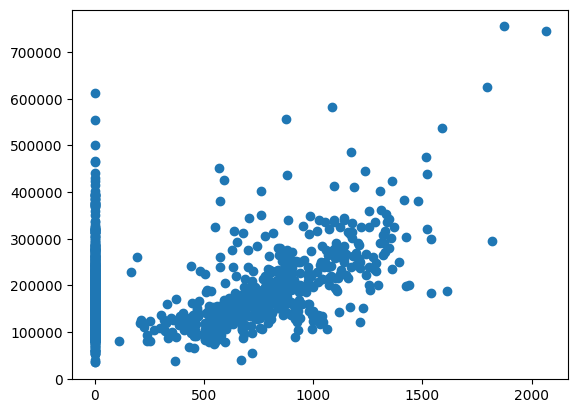

In [161]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_data)

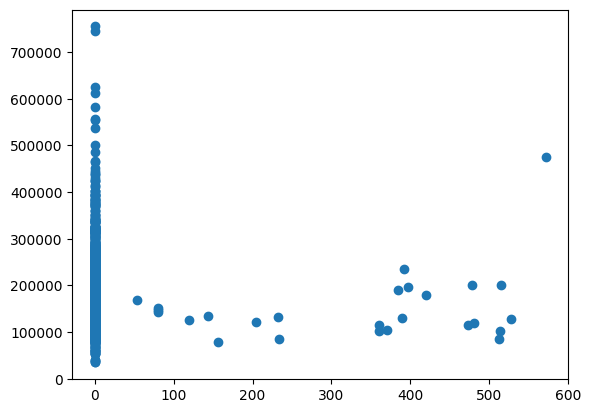

In [162]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_data)

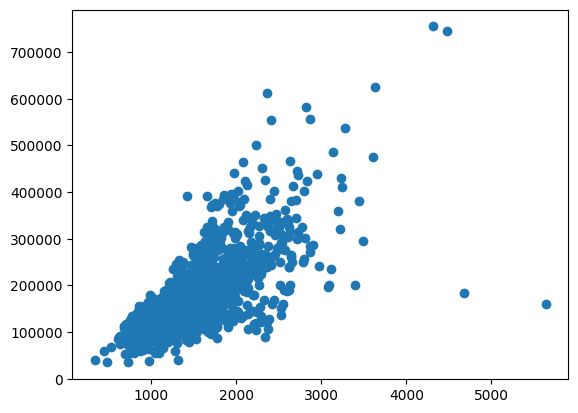

In [163]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_data)

In [164]:



outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('GrLivArea > 4000')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)


[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.  524.
  692. 1183. 1299.]


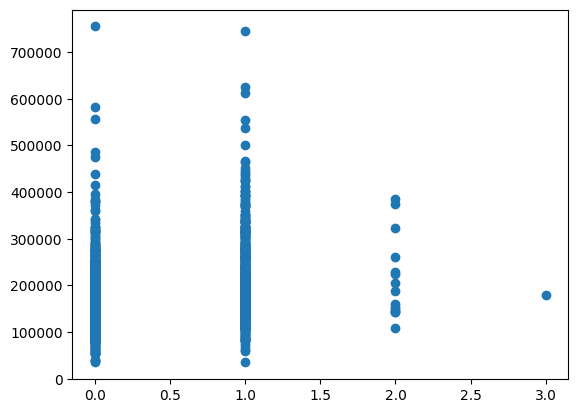

In [165]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_data)

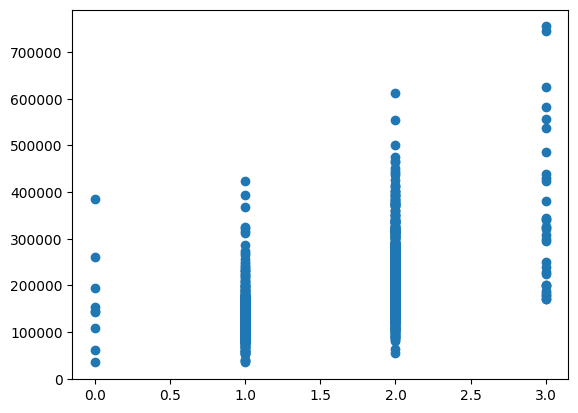

In [166]:
plt.scatter(x='FullBath', y='SalePrice', data=train_data)

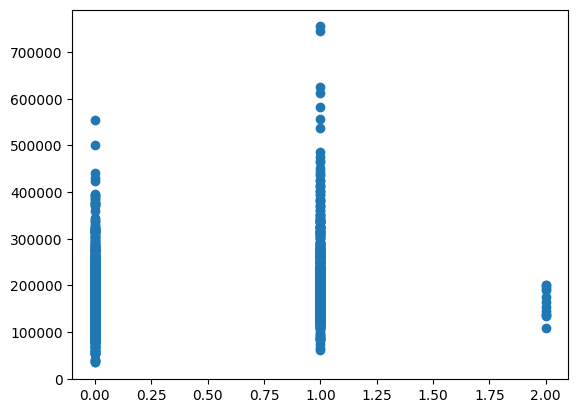

In [167]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_data)

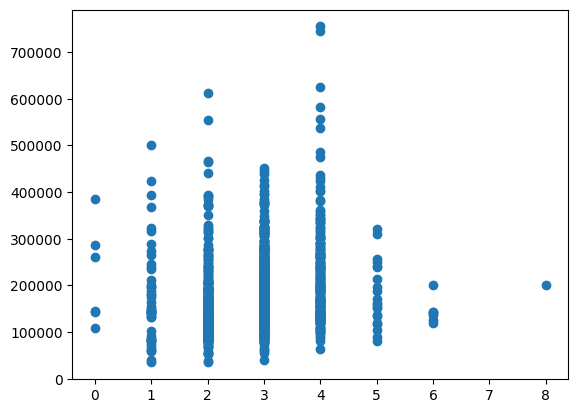

In [168]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_data)

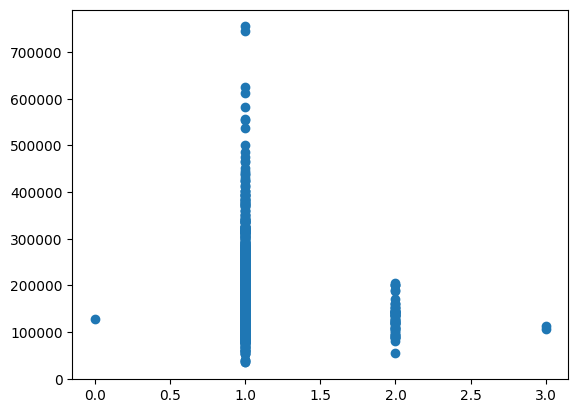

In [169]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_data)

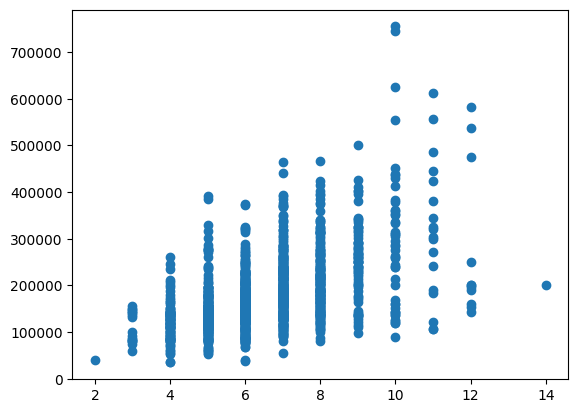

In [170]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_data)

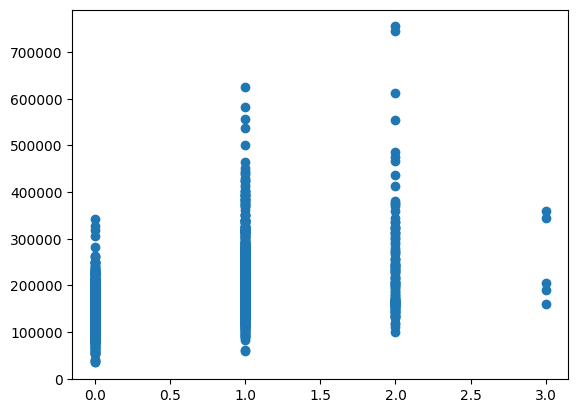

In [171]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_data)

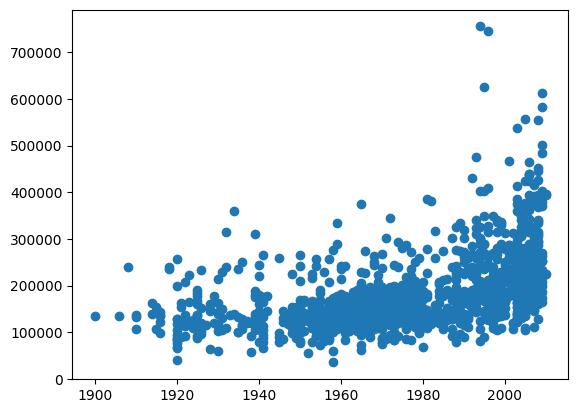

In [172]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_data)

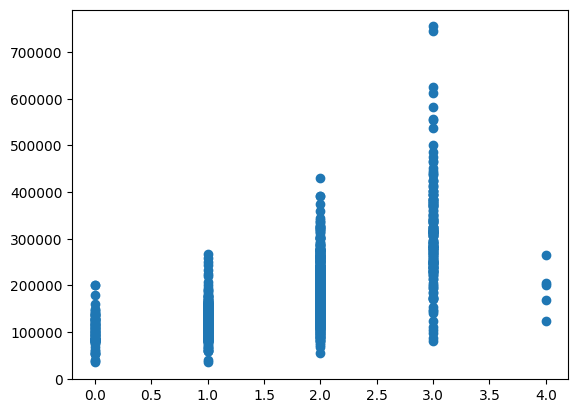

In [173]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_data)

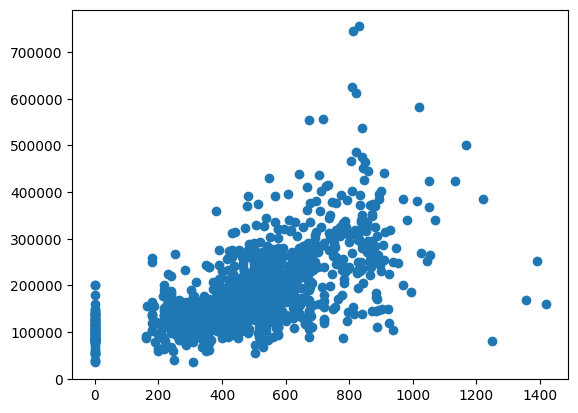

In [174]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_data)

In [175]:
outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('GarageArea > 1280')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)




[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.  524.
  692. 1183. 1299.  582. 1191. 1299.]


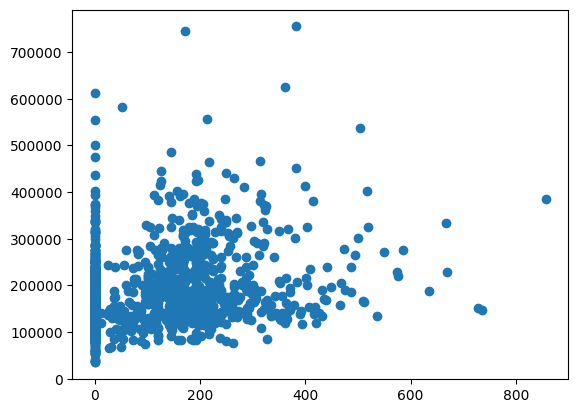

In [176]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_data)

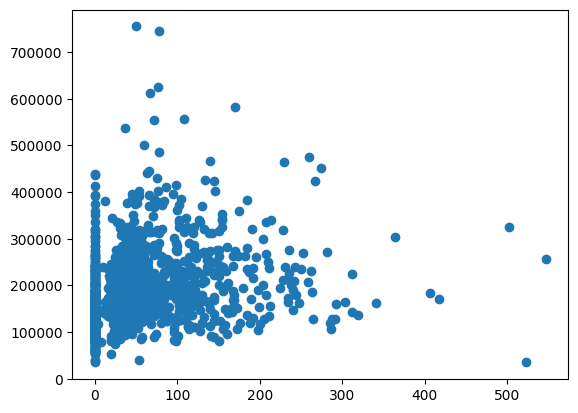

In [177]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_data)

In [178]:


outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('OpenPorchSF > 500')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)




[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.  524.
  692. 1183. 1299.  582. 1191. 1299.  496.  584. 1329.]


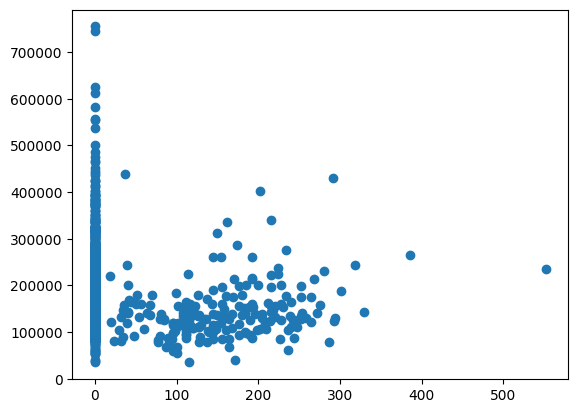

In [179]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_data)

In [180]:

outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('EnclosedPorch > 500')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)


[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.  524.
  692. 1183. 1299.  582. 1191. 1299.  496.  584. 1329.  198.]


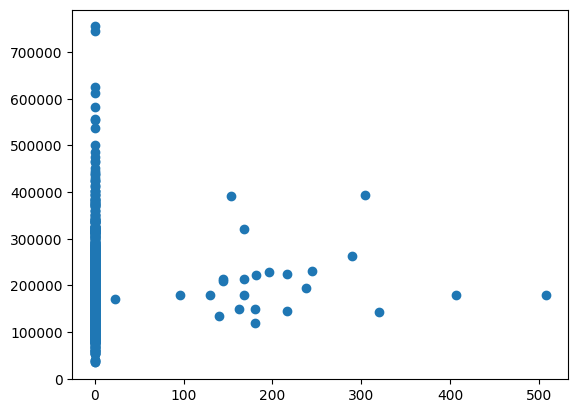

In [181]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_data)

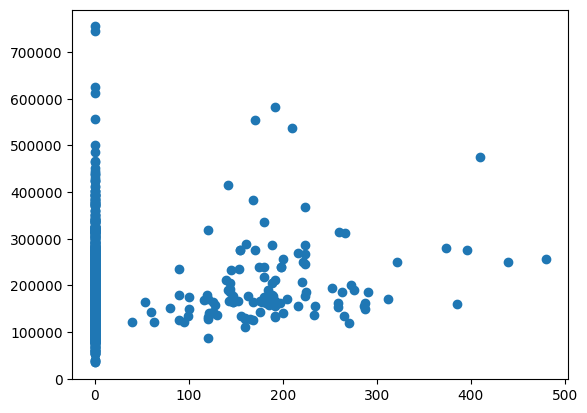

In [182]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_data)

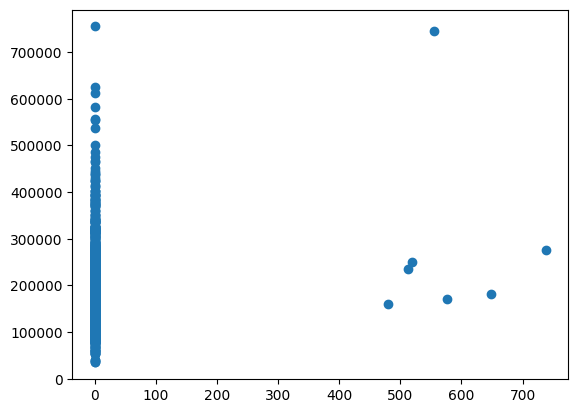

In [183]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_data)

In [184]:

outliers_Id = np.insert(outliers_Id, len(outliers_Id -1), np.array(train_data.query('PoolArea > 400')['Id']))

# (train_data.query('LotFrontage > 295')['Id'])

print(outliers_Id)


[ 935. 1299.  250.  314.  336.  379.  298.  692. 1170. 1299. 1299.  524.
  692. 1183. 1299.  582. 1191. 1299.  496.  584. 1329.  198.  198.  811.
 1171. 1183. 1299. 1387. 1424.]


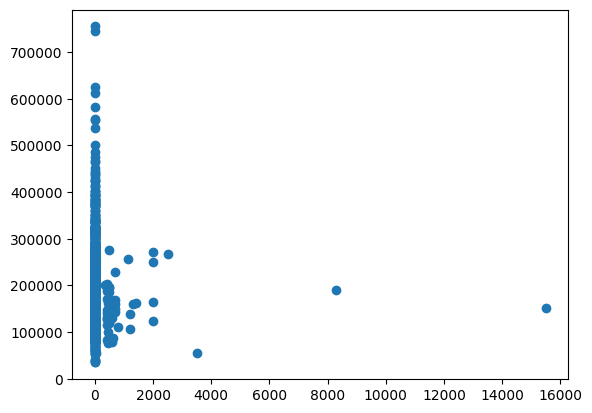

In [185]:
plt.scatter(x='MiscVal', y='SalePrice', data=train_data)

In [186]:
train_data['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500], dtype=int64)

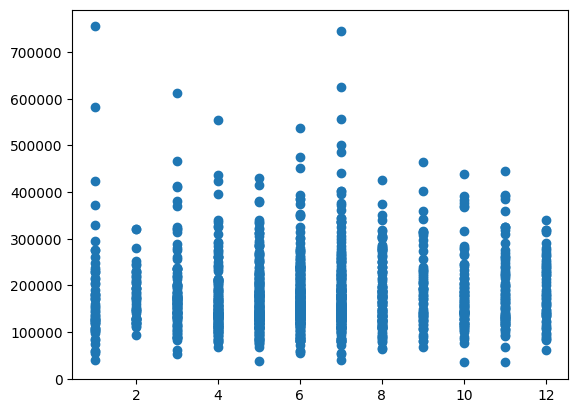

In [187]:
plt.scatter(x='MoSold', y='SalePrice', data=train_data)

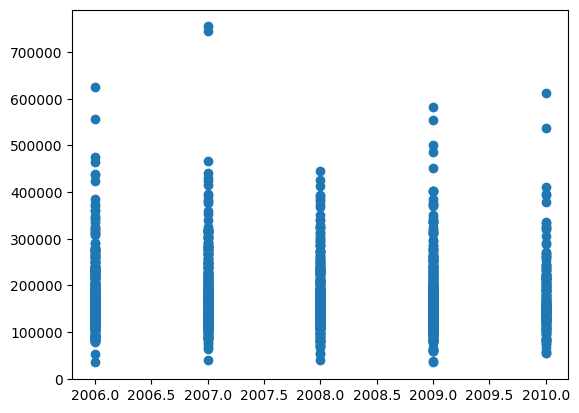

In [188]:
plt.scatter(x='YrSold', y='SalePrice', data=train_data)

<Axes: xlabel='SalePrice', ylabel='Count'>

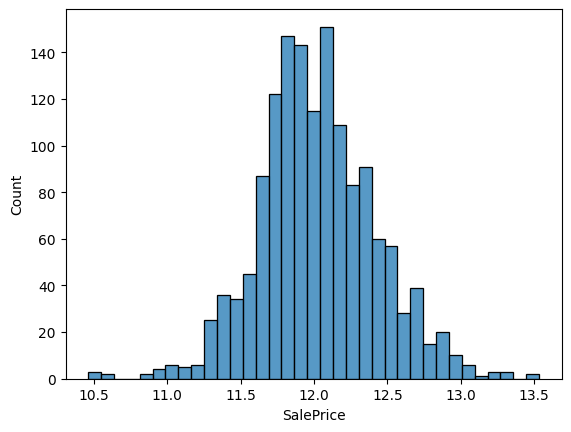

In [189]:
sns.histplot( np.log1p(train_data['SalePrice']))

In [190]:
outliers_Id = pd.DataFrame(outliers_Id)

# outliers_Id

In [191]:
# train_data = train_data[train_data.Id.isin(outliers_Id.values) == False]

# missing_columns = train_data.isnull().sum()
# missing_columns = missing_columns[missing_columns>0]
# missing_columns = [i for i,j in missing_columns.items() if (j/len(train_data) * 100) >0]
# missing_columns

## Numerical Data

In [192]:
numerical_columns = train_data.dtypes[train_data.dtypes != 'O']
# numerical_columns.index

In [193]:
missing_columns = train_data[numerical_columns.index].isnull().sum()
missing_columns = missing_columns[missing_columns>0]

missing_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [194]:
# train_data['LotFrontage'].fillna(0, inplace=True)

In [195]:
# train_data['MasVnrArea'].fillna(0, inplace=True)

## Categorical Data

In [196]:
categorical_columns = train_data.dtypes[train_data.dtypes == 'O']


In [197]:
missing_columns = train_data[categorical_columns.index].isnull().sum()
missing_columns = missing_columns[missing_columns>0]

missing_columns

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [198]:
train_data['Alley'].fillna('No', inplace = True)
train_data['MasVnrType'].fillna('No', inplace = True)
train_data['BsmtQual'].fillna('No_Bsmt', inplace = True)
train_data['BsmtCond'].fillna('No_Bsmt', inplace = True)
train_data['BsmtExposure'].fillna('No_Bsmt', inplace = True)
train_data['BsmtFinType1'].fillna('No_Bsmt', inplace = True)
train_data['BsmtFinType2'].fillna('No_Bsmt', inplace = True)
train_data['FireplaceQu'].fillna('No', inplace = True)
train_data['GarageType'].fillna('No', inplace = True)
train_data['GarageFinish'].fillna('No', inplace = True)
train_data['GarageQual'].fillna('No', inplace = True)
train_data['GarageCond'].fillna('No', inplace = True)
train_data['PoolQC'].fillna('No', inplace = True)
train_data['Fence'].fillna('No', inplace = True)
train_data['MiscFeature'].fillna('No', inplace = True)



test_data['Alley'].fillna('No', inplace = True)
test_data['MasVnrType'].fillna('No', inplace = True)
test_data['BsmtQual'].fillna('No_Bsmt', inplace = True)
test_data['BsmtCond'].fillna('No_Bsmt', inplace = True)
test_data['BsmtExposure'].fillna('No_Bsmt', inplace = True)
test_data['BsmtFinType1'].fillna('No_Bsmt', inplace = True)
test_data['BsmtFinType2'].fillna('No_Bsmt', inplace = True)
test_data['FireplaceQu'].fillna('No', inplace = True)
test_data['GarageType'].fillna('No', inplace = True)
test_data['GarageFinish'].fillna('No', inplace = True)
test_data['GarageQual'].fillna('No', inplace = True)
test_data['GarageCond'].fillna('No', inplace = True)
test_data['PoolQC'].fillna('No', inplace = True)
test_data['Fence'].fillna('No', inplace = True)
test_data['MiscFeature'].fillna('No', inplace = True)

In [199]:
missing_columns = train_data[categorical_columns.index].isnull().sum()
missing_columns = missing_columns[missing_columns>0]

missing_columns

Electrical    1
dtype: int64

In [200]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000


## Feature Engineering

In [201]:
yr_columns = [i for i, j in train_data.items() if ('Yr' in i) or ('Year' in i)]
yr_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [202]:
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['HouseRemodificationAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']


test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['HouseRemodificationAge'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']

<Axes: xlabel='HouseRemodificationAge', ylabel='Count'>

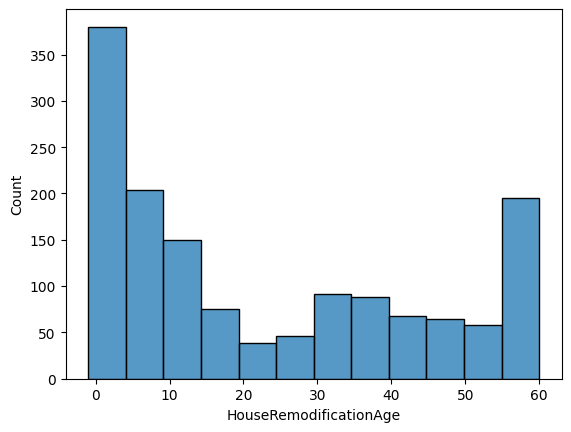

In [203]:
sns.histplot(train_data['HouseRemodificationAge'])

In [204]:
train_data = train_data.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold',  'PoolQC', 'Fence', 'MiscFeature','GarageCond'])
test_data = test_data.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold',  'PoolQC', 'Fence', 'MiscFeature','GarageCond'])

In [205]:
numerical_columns = train_data.dtypes[train_data.dtypes != 'O']
numerical_columns.index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge',
       'HouseRemodificationAge', 'GarageAge'],
      dtype='object')

In [206]:
train_data['totalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['BsmtFinSF1'] + train_data['BsmtFinSF2']
train_data['totalarea'] = train_data['GrLivArea'] + train_data['TotalBsmtSF']
train_data['totalbath'] = train_data['FullBath'] + train_data['BsmtFullBath'] + 0.5 * (train_data['BsmtHalfBath'] + train_data['HalfBath'] )
train_data['totalporch'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']


test_data['totalSF'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + test_data['BsmtFinSF1'] + test_data['BsmtFinSF2']
test_data['totalarea'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']
test_data['totalbath'] = test_data['FullBath'] + test_data['BsmtFullBath'] + 0.5 * (test_data['BsmtHalfBath'] + test_data['HalfBath'] )
test_data['totalporch'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']


In [207]:
train_data = train_data.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtFullBath','BsmtHalfBath','HalfBath', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])
test_data = test_data.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtFullBath','BsmtHalfBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])

<Axes: >

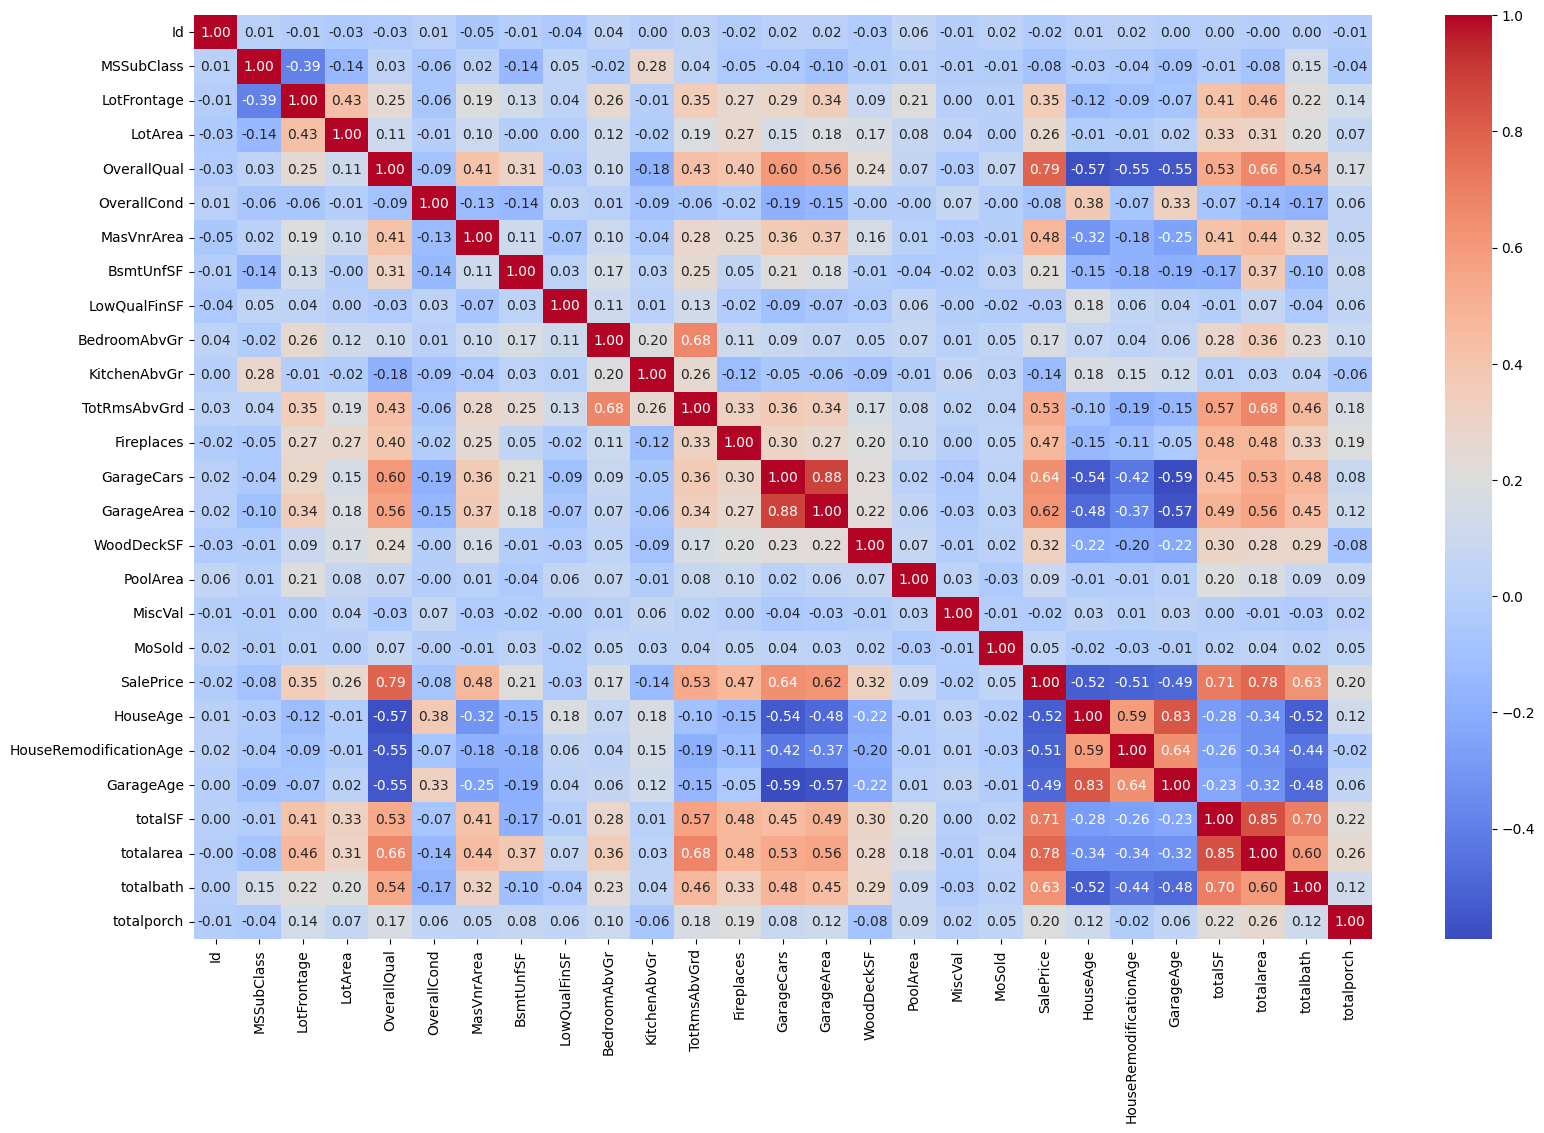

In [208]:
plt.figure(figsize=(19,12))
sns.heatmap(train_data.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")


In [209]:
train_data = train_data.drop(columns=['GarageArea'])
test_data = test_data.drop(columns=['GarageArea'])

## converting to log

In [210]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

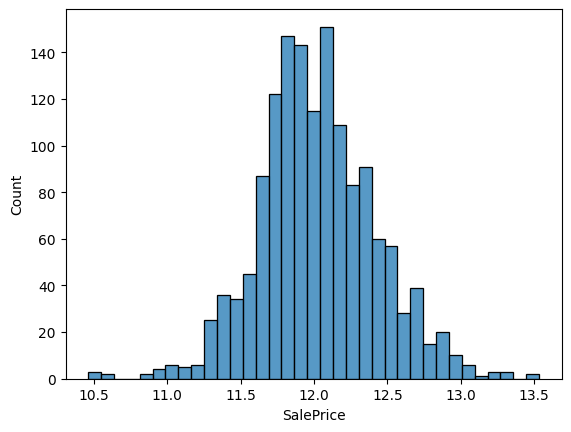

In [211]:
sns.histplot(train_data['SalePrice'] )

## Preprocessing pipelines


In [212]:
# train_data.drop(columns= ['Id'], axis=1, inplace=True)
# y_train_data = train_data['SalePrice']

# X_train_data.head()
#################################################



numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('SalePrice')
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge',
       'HouseRemodificationAge', 'GarageAge', 'totalSF', 'totalarea',
       'totalbath', 'totalporch'],
      dtype='object')

In [213]:
numerical_pipeline=Pipeline(steps=[('impute', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodificationAge,GarageAge,totalSF,totalarea,totalbath,totalporch
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,GasA,Ex,Y,SBrkr,0,3,1,Gd,8,Typ,0,No,Attchd,RFn,2,TA,Y,0,0,0,2,WD,Normal,12.247699,5,5,5.0,2416,2566,3.5,61
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,GasA,Ex,Y,SBrkr,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,Y,298,0,0,5,WD,Normal,12.109016,31,31,31.0,2240,2524,2.5,0
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,GasA,Ex,Y,SBrkr,0,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,Y,0,0,0,9,WD,Normal,12.317171,7,6,7.0,2272,2706,3.5,42
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,GasA,Gd,Y,SBrkr,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,Y,0,0,0,2,WD,Abnorml,11.849405,91,36,8.0,1933,2473,2.0,307
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,GasA,Ex,Y,SBrkr,0,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,Y,192,0,0,12,WD,Normal,12.429220,8,8,8.0,2853,3343,3.5,84


In [214]:
# train_data.drop(columns=['SalePrice'], inplace=True)
Categorical_columns = train_data.dtypes[train_data.dtypes == 'O']
# train_data =train_data.drop(['Id'], axis=1)
Categorical_columns = train_data.columns.tolist()

In [215]:
ode_columns= ['LotShape', 'LandSlope',  'LandContour', 'Utilities', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',\
             'Heating', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']

In [216]:
ohe_columns = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', \
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',\
               'SaleType', 'SaleCondition']

In [217]:
ode_pipeline=Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ode', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1))])
ohe_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown= 'ignore', sparse_output=False))])

In [218]:
column_transform = ColumnTransformer(transformers=[('num_p', numerical_pipeline, numerical_columns), ('ode_p', ode_pipeline, ode_columns), ('ohe_p', ohe_pipeline, ohe_columns)],
                                     remainder= 'passthrough', n_jobs=-1)                                       
                                     

In [219]:
pipe = Pipeline(steps=[('preprocessing', column_transform)])
# train_data.head()

In [220]:
X_train_data = train_data.drop(columns= ['SalePrice'], axis=1)
# X_train_data.head()

In [221]:
test_data = test_data.drop(columns=['Id'], axis=1)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,HouseAge,HouseRemodificationAge,GarageAge,totalSF,totalarea,totalbath,totalporch
0,20,RH,80.0,11622,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,270.0,GasA,TA,Y,SBrkr,0,2,1,TA,5,Typ,0,No,Attchd,Unf,1.0,TA,Y,140,0,0,6,WD,Normal,49,49,49.0,1508.0,1778.0,1.0,120
1,20,RL,81.0,14267,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,406.0,GasA,TA,Y,SBrkr,0,3,1,Gd,6,Typ,0,No,Attchd,Unf,1.0,TA,Y,393,0,12500,6,WD,Normal,52,52,52.0,2252.0,2658.0,1.5,36
2,60,RL,74.0,13830,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,137.0,GasA,Gd,Y,SBrkr,0,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,TA,Y,212,0,0,3,WD,Normal,13,12,13.0,2420.0,2557.0,2.5,34
3,60,RL,78.0,9978,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,324.0,GasA,Ex,Y,SBrkr,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,TA,Y,360,0,0,6,WD,Normal,12,12,12.0,2206.0,2530.0,2.5,36
4,120,RL,43.0,5005,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,No,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1017.0,GasA,Ex,Y,SBrkr,0,2,1,Gd,5,Typ,0,No,Attchd,RFn,2.0,TA,Y,0,0,0,1,WD,Normal,18,18,18.0,1543.0,2560.0,2.0,226


In [222]:
x_proc = pipe.fit_transform(X_train_data)



In [223]:
Y_train = np.log1p(train_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

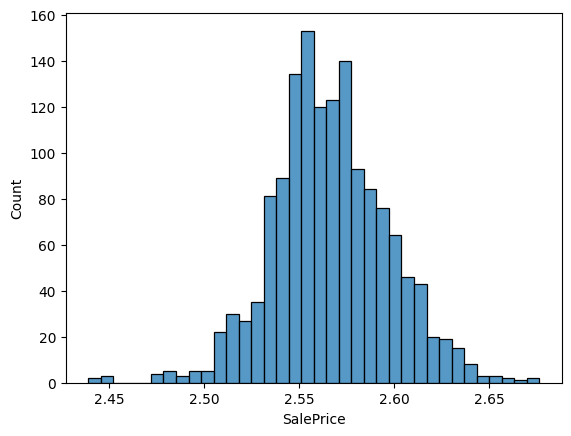

In [224]:
sns.histplot(Y_train)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(x_proc, Y_train, test_size=0.2, random_state=25)

In [226]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [227]:
y_pred_lr = lr.predict(X_test)

In [228]:
# mean_squared_error(y_test, y_pred_lr)

mean_absolute_percentage_error(y_test, y_pred_lr)


7293663.967696311

In [229]:
y_test

932     2.615648
409     2.620018
1271    2.575064
270     2.602042
1290    2.572879
          ...   
260     2.570950
138     2.591205
586     2.547513
1346    2.601059
1384    2.530655
Name: SalePrice, Length: 292, dtype: float64

In [230]:
# y_pred_lr

In [231]:
RFR = RandomForestRegressor(random_state=13)

In [232]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [233]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [234]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [235]:
y_pred_RF = rfr_cv.predict(X_test)

In [236]:
mean_absolute_percentage_error(y_test, y_pred_RF)

0.0028995561402835528

In [237]:
y_test.head()

932     2.615648
409     2.620018
1271    2.575064
270     2.602042
1290    2.572879
Name: SalePrice, dtype: float64

In [238]:
# y_pred_RF

In [239]:
mean_squared_error(y_test, y_pred_RF)

0.00010611185881556363

In [ ]:
np.sqrt(-1 * rfr_cv.best_score_)

In [241]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [242]:
y_pred_xg = xgb_cv.predict(X_test)

In [243]:
mean_absolute_percentage_error(y_test, y_pred_xg)


0.002506000563462822

In [244]:
np.sqrt(-1 * xgb_cv.best_score_)

0.010489847895123085

In [245]:
mean_squared_error(y_test, y_pred_xg)

8.757520770684027e-05

In [246]:
np.sqrt(-1 * xgb_cv.best_score_)

# xgb_cv.best_params_

0.010489847895123085

In [247]:
GBR = GradientBoostingRegressor()

In [248]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [ ]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

GBR_cv.fit(X_train, y_train)

In [126]:
np.sqrt(-1 * GBR_cv.best_score_)

0.01003659343453861

In [127]:
lgbm_regressor = lgb.LGBMRegressor()

In [128]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [129]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [130]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2387
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 131
[LightGBM] [Info] Start training from score 2.565751


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [132]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.010862697347359665

In [133]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [134]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [135]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [136]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000021297D28E80>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [137]:
np.sqrt(-1 * cat_cv.best_score_)

0.010052470963336701